In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import glob

In [19]:
path = Path(r"Z:\scratch\vr-foraging\scratchpad\data_lickometer\Test3")

camera_lick_path = glob.glob(str(path / '*cameraaverage*'))[0]
camera_metadata_path = glob.glob(str(path / '*camerametadata*'))[0]
frame_timestamp_path = glob.glob(str(path / '*frametimestamp*'))[0]
lickometer_events_path = glob.glob(str(path / '*lickometer*'))[0]
behavior_events_path = glob.glob(str(path / '*ttllick*'))[0]

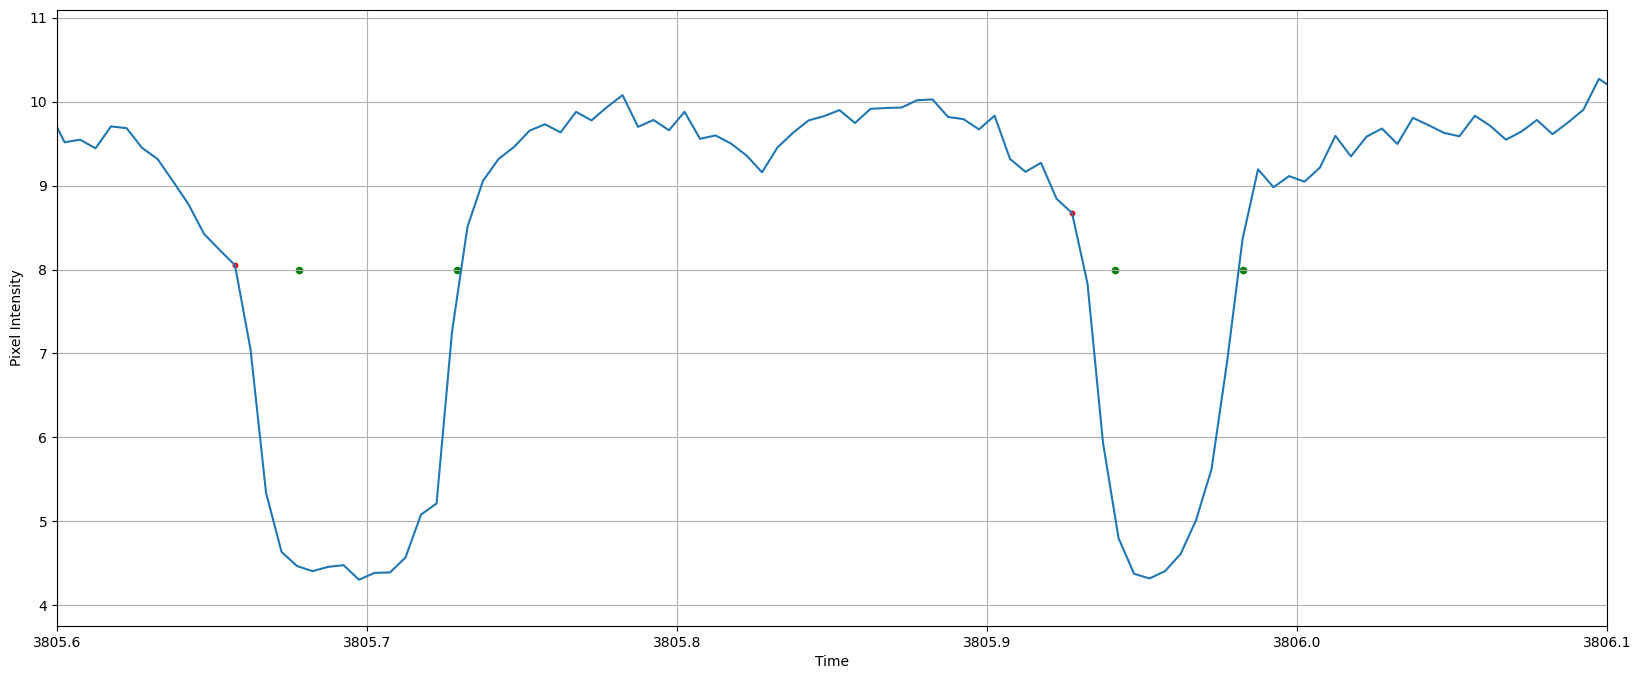

In [51]:
camera_lick = np.loadtxt(camera_lick_path,
                 delimiter=",")[:,0]
threshold = 8
crosses = (camera_lick < threshold).astype(int)
lick_onset = np.where(np.diff(crosses) == 1)[0]

frame_time = np.loadtxt(frame_timestamp_path)[1:]

behavior_lick_time = np.loadtxt(behavior_events_path)


win_size = .5
win_start = 3805.6
plt.figure(figsize=(20,8))
plt.plot(frame_time, camera_lick)
plt.scatter(frame_time[lick_onset], camera_lick[lick_onset], c='r', s=10)
plt.scatter(behavior_lick_time, np.ones(len(behavior_lick_time))*threshold, c='g', s=20)
plt.xlabel("Time")
plt.ylabel("Pixel Intensity")
plt.xlim((win_start, win_start+win_size))
plt.grid()



C:\Users\bruno.cruz\AppData\Local\Temp\ipykernel_32924\967808093.py:5: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(lickometer_events["time"].values -  behavior_lick_time), 1000)
c:\git\AllenNeuralDynamics\aind-vr-foraging-analysis\.venv\Lib\site-packages\matplotlib\axes\_axes.py:6826: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
c:\git\AllenNeuralDynamics\aind-vr-foraging-analysis\.venv\Lib\site-packages\matplotlib\axes\_axes.py:6827: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

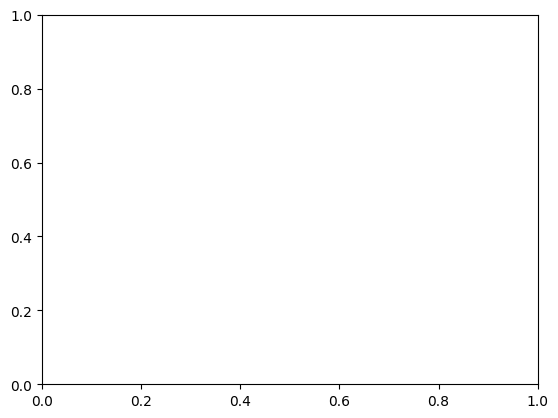

In [70]:
lickometer_events = pd.read_csv(lickometer_events_path, header=None, skiprows=0, names=["state", "time"])


plt.figure()
plt.hist(lickometer_events["time"].values -  behavior_lick_time, 1000)
plt.xlabel("Time Difference (s)")
plt.ylabel("Count")